In [1]:
import librosa
import soundfile as sf
import librosa.display
import numpy as np

In [2]:
file_path = '../data/spcup_2022_training_part1/00a0661d8351e5132cb0df5e1b4f19e2.wav'

In [3]:
data, sample = sf.read(file_path, dtype='float32')

In [4]:
data.shape

(92509,)

In [5]:
y, sr = librosa.load(file_path)

In [6]:
import matplotlib.pyplot as plt

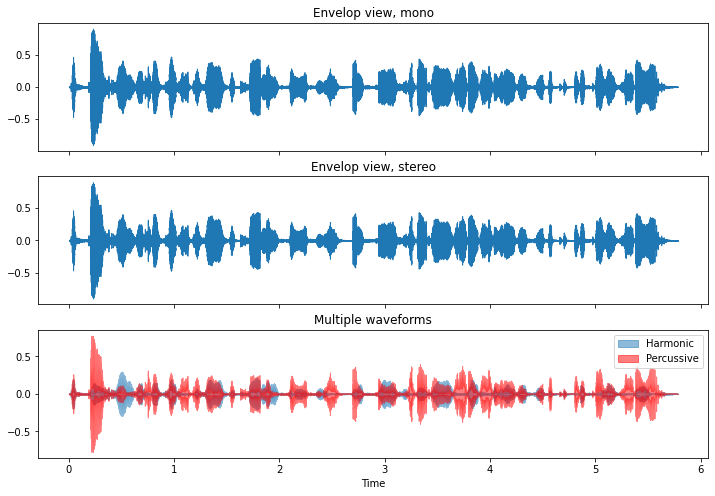

In [7]:
fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(12,8))

librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Envelop view, mono')
ax[0].label_outer()

y, sr = librosa.load(file_path, mono=False)

librosa.display.waveshow(y, sr=sr, ax=ax[1])
ax[1].set(title='Envelop view, stereo')
ax[1].label_outer()

y, sr = librosa.load(file_path)

y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[2], label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[2], label='Percussive')
ax[2].set(title='Multiple waveforms')
ax[2].legend()


In [8]:
plt.close()

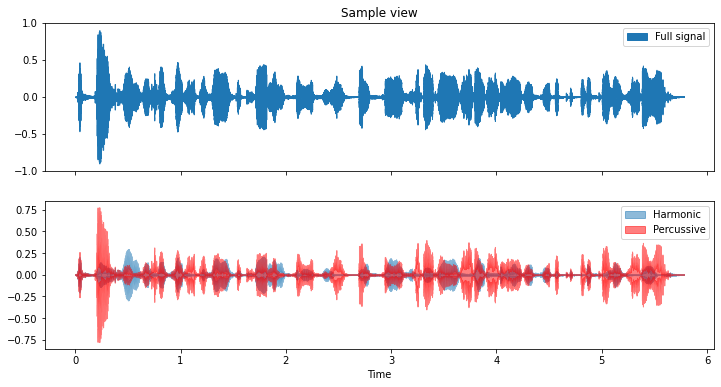

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(12,6))
y_harm, y_perc = librosa.effects.hpss(y)
ax1.set(ylim=[-1, 1], title='Sample view')
librosa.display.waveshow(y, sr=sr, ax=ax1, marker='.', label='Full signal')
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax2, label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax2, label='Percussive')
ax1.label_outer()
ax1.legend()
ax2.legend()


Spectrogram Analysis

[(1.0, 3.0)]

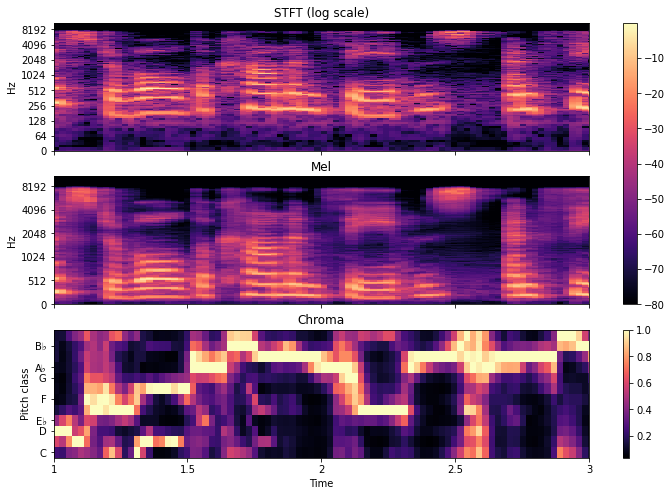

In [10]:
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

M = librosa.feature.melspectrogram(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)

D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Construct a subplot grid with 3 rows and 1 column, sharing the x-axis)
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(12,8))

# On the first subplot, show the original spectrogram
img1 = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='STFT (log scale)')

# On the second subplot, show the mel spectrogram
img2 = librosa.display.specshow(M_db, x_axis='time', y_axis='mel', ax=ax[1])
ax[1].set(title='Mel')

# On the third subplot, show the chroma features
img3 = librosa.display.specshow(chroma, x_axis='time', y_axis='chroma',
                                key='Eb:maj', ax=ax[2])
ax[2].set(title='Chroma')

# To eliminate redundant axis labels, we'll use "label_outer" on all subplots:
for ax_i in ax:
    ax_i.label_outer()

# And we can share colorbars:
fig.colorbar(img1, ax=[ax[0], ax[1]])

# Or have individual colorbars:
fig.colorbar(img3, ax=[ax[2]])

# We can then even do fancy things like zoom into a particular time and frequency
# region.  Since the axes are shared, this will apply to all three subplots at once.
ax[0].set(xlim=[1, 3])  # Zoom to seconds 1-3